## Data Cleaning
In this notebook, I will be processing the data from a CSV file, and then cleaning it to be used for analysis in the other notebooks<br> 
<br>
The dataset is taken from kaggle (https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey). The target audience of the survey are students who took up IT-related courses in University.

In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import dataset
df = pd.read_csv("../data/MentalHealthSurvey.csv")

#### Checking

In [17]:
# Quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [18]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [19]:
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
df.dtypes

gender                      object
age                          int64
university                  object
degree_level                object
degree_major                object
academic_year               object
cgpa                        object
residential_status          object
campus_discrimination       object
sports_engagement           object
average_sleep               object
study_satisfaction           int64
academic_workload            int64
academic_pressure            int64
financial_concerns           int64
social_relationships         int64
depression                   int64
anxiety                      int64
isolation                    int64
future_insecurity            int64
stress_relief_activities    object
dtype: object

In [21]:
df[df.duplicated()]

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities


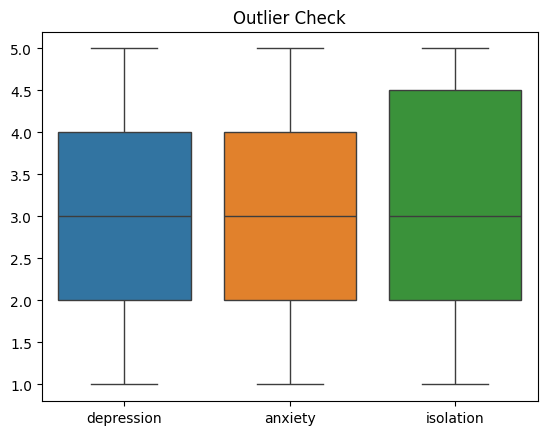

In [26]:
# Boxplot to identify outliers
sns.boxplot(data=df[['depression', 'anxiety', 'isolation']])
plt.title('Outlier Check')
plt.show()

In [30]:
# Categorical data count
print(f'{df["degree_major"].value_counts()}\n')
print(f'{df["university"].value_counts()}\n')
print(f'{df["academic_year"].value_counts()}\n')
print(f'{df["cgpa"].value_counts()}\n')
print(f'{df["residential_status"].value_counts()}\n')
print(f'{df["sports_engagement"].value_counts()}\n')
print(f'{df["average_sleep"].value_counts()}')


degree_major
Data Science              41
Computer Science          34
Information Technology     9
Software Engineering       3
Name: count, dtype: int64

university
PU         56
UET        10
COMSATS     9
FAST        6
UMT         2
NUST        1
VU          1
UOL         1
KUST        1
Name: count, dtype: int64

academic_year
1st year    34
3rd year    28
2nd year    15
4th year    10
Name: count, dtype: int64

cgpa
3.0-3.5    27
3.5-4.0    27
2.5-3.0    22
0.0-0.0     5
2.0-2.5     4
1.5-2.0     2
Name: count, dtype: int64

residential_status
Off-Campus    65
On-Campus     22
Name: count, dtype: int64

sports_engagement
No Sports    42
1-3 times    24
4-6 times    11
7+ times     10
Name: count, dtype: int64

average_sleep
4-6 hrs    50
7-8 hrs    32
2-4 hrs     5
Name: count, dtype: int64


These checks allow me to analyse my data deeper and identify the flaws within my dataset.

1. Identify which column has the wrong data types
2. Identify columns that contain null values
3. Identify columns/rows that are not needed for analysis and can be removed
4. Identify outliers
5. Identify duplicated values
6. Overview of categorical data

With this, it allows us to move smoothly to the next step, which is cleansing the data.

#### Cleaning


In [31]:
# Handling missing values
df = df.dropna()

In [32]:
# Check for the rows with 'degree_level' = Postgraduate
postgraduate = print(df[df['degree_level'] == "Postgraduate"])

  gender  age university  degree_level      degree_major academic_year  \
1   Male   20        UET  Postgraduate  Computer Science      3rd year   
6   Male   26         PU  Postgraduate      Data Science      1st year   

      cgpa residential_status campus_discrimination sports_engagement  ...  \
1  3.0-3.5         Off-Campus                    No         1-3 times  ...   
6  2.5-3.0          On-Campus                   Yes         1-3 times  ...   

  study_satisfaction  academic_workload   academic_pressure  \
1                  5                   4                  4   
6                  4                   4                  4   

   financial_concerns  social_relationships  depression  anxiety  isolation  \
1                   1                     3           3        3          3   
6                   5                     2           5        4          4   

   future_insecurity                  stress_relief_activities  
1                  4                      Online 

As we analyse the data, we can see that only 2 out of 88 students have a degree level of 'Postgraduate', which is not a meaningful sample especially if we compare by degree level. Hence, I removed those 2 rows so that we can fully focus on Undergraduate students.

In [33]:
# Drop rows with 'degree_level' = Postgraduate
df = df[df['degree_level'] != "Postgraduate"]

After analysing the outputs above, there was not much to clean. However, I still conducted a removal of null values so as to make sure that the data is fully clean.

#### Saving cleaned dataset

In [34]:
df.to_csv("../data/MentalHealthSurvey_Cleaned.csv", index=False)
print("Data cleaning completed!")

Data cleaning completed!


Now that data cleaning is completed, we can proceed to Exploratory Data Analysis!